# preprocessing

In [1]:
!rm -rf TabularDS  # Remove the existing directory
!git clone https://github.com/ItamarBerger/TabularDS


Cloning into 'TabularDS'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 463 (delta 20), reused 15 (delta 2), pack-reused 387 (from 2)
Receiving objects: 100% (463/463), 32.00 MiB | 24.24 MiB/s, done.
Resolving deltas: 100% (192/192), done.
Updating files: 100% (19/19), done.


In [3]:
import pandas as pd
transactions = pd.read_csv('/content/TabularDS/final_project/data/movies_with_clusters.csv')
min_support = 0.00005

In [6]:
transactions.head()

,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),GoldenEye (1995),"American President, The (1995)",Casino (1995),Sense and Sensibility (1995),...,WALL·E (2008),Inglourious Basterds (2009),Star Trek (2009),Up (2009),"Hangover, The (2009)",District 9 (2009),Avatar (2009),Inception (2010),"Social Network, The (2010)",Cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36


#Apriori for rule mining

In [92]:
# data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# data.dropna(subset=['InvoiceNo', 'Description'], inplace=True)

# transactions = data.groupby('CustomerID')['Description'].apply(list).tolist()
# print(f"number of transactions is: {len(transactions)}")

In [120]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules


frequent_itemsets = fpgrowth(transactions, min_support=min_support, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                           antecedents  \
0    (Star Wars: Episode I - The Phantom Menace (19...   
1                                  (Waterworld (1995))   
2                                  (Braveheart (1995))   
3                                (Forrest Gump (1994))   
4             (One Flew Over the Cuckoo's Nest (1975))   
..                                                 ...   
247                 (Silence of the Lambs, The (1991))   
248                                  (Fly, The (1986))   
249                             (Jurassic Park (1993))   
250                     (Beverly Hills Cop III (1994))   
251             (Independence Day (a.k.a. ID4) (1996))   

                                           consequents  antecedent support  \
0                                  (Waterworld (1995))            0.003063   
1    (Star Wars: Episode I - The Phantom Menace (19...            0.003197   
2                                (Forrest Gump (1994))            0.0

# Baseline apriori results

In [ ]:

print(f"number of rules is: {len(rules)}")
print(rules[0:10])

In [121]:
import numpy as np

# Calculate the average support, confidence, and lift from the rules DataFrame
avg_support = np.mean(rules['support'])
avg_confidence = np.mean(rules['confidence'])
avg_lift = np.mean(rules['lift'])

# Print the metrics
print(f"\nMetrics: Support average: {avg_support:.4f}, Confidence average: {avg_confidence:.4f}, Lift average: {avg_lift:.4f}")

# Store the rules and itemsets for later use
original_rules = rules
original_itemsets = frequent_itemsets



Metrics: Support average: 0.0001, Confidence average: 0.0400, Lift average: 18.2813


## Visualize top rules
### (sorted by lift)

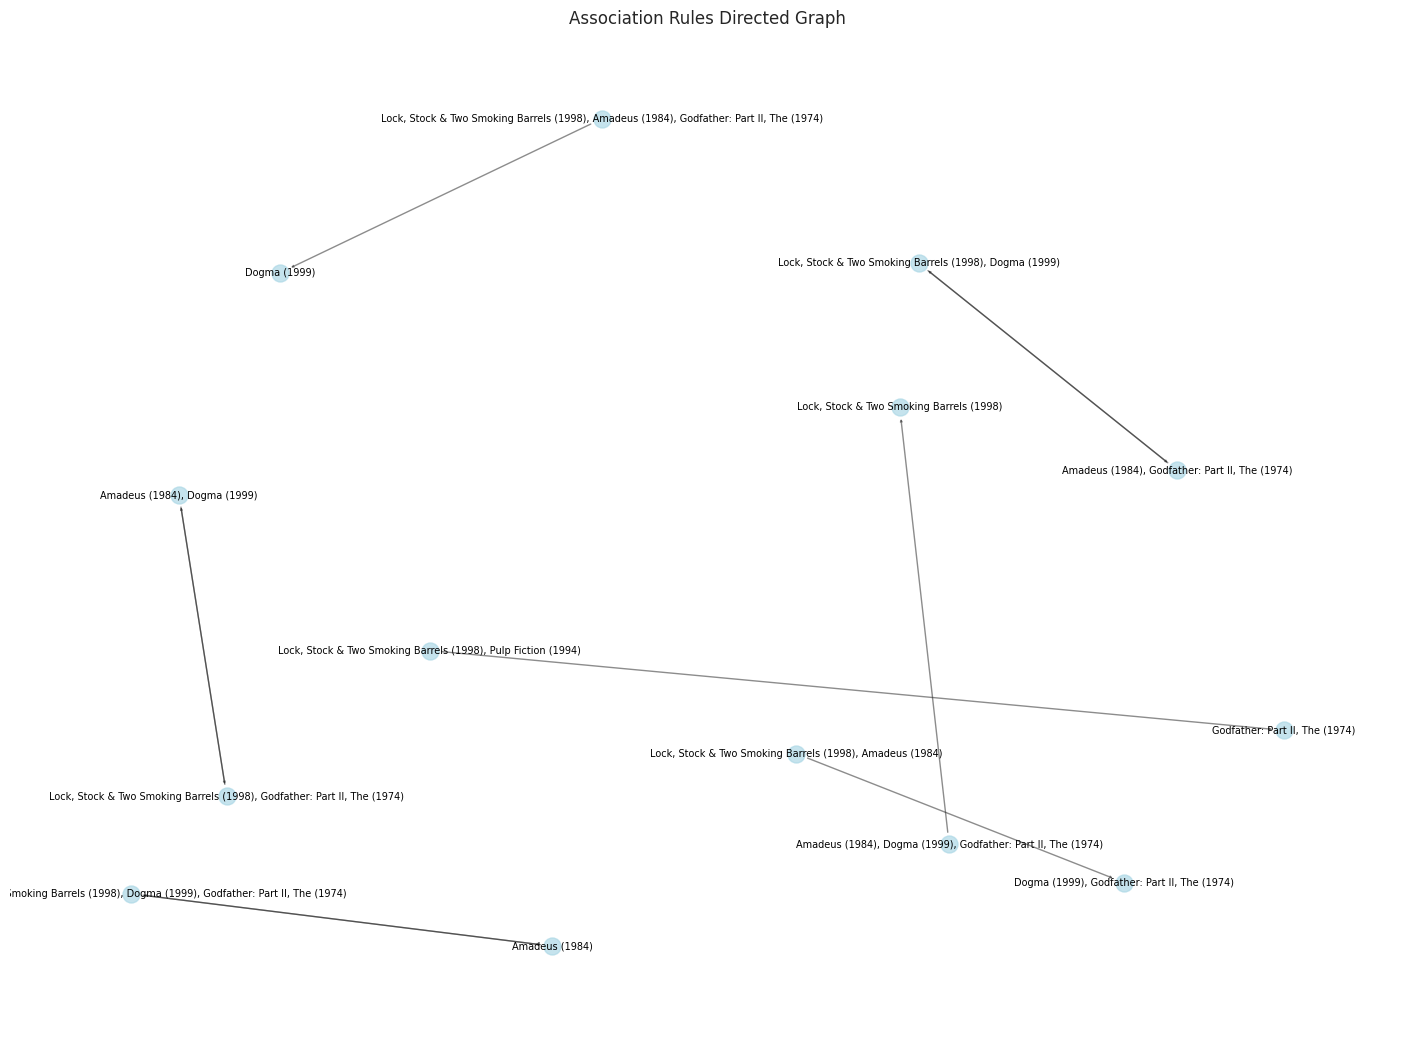

In [165]:
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules
def plot_topk_rules_in_graph(rules, frequent_itemsets, k=10):

    # Create a directed graph
    G = nx.DiGraph()
    narrow_rules = rules.sort_values(by='lift', ascending=False).head(k)
    # Add nodes and directed edges
    for _, rule in narrow_rules.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))

        # Add a directed edge from antecedent to consequent
        G.add_edge(antecedent, consequent)

    # Draw the directed graph
    plt.figure(figsize=(18, 13))
    pos = nx.spring_layout(G, k=0.5, iterations=k)  # Layout for the graph

    # Draw the nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=150, node_color='lightblue', alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, arrowstyle='->', arrowsize=3)
    nx.draw_networkx_labels(G, pos, font_size=7, font_color='black')

    # Add edge labels (optional, if you want to display lift, confidence, or support)
    # edge_labels = nx.get_edge_attributes(G, 'weight')
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Association Rules Directed Graph")
    plt.axis('off')
    plt.show()

plot_topk_rules_in_graph(rules, frequent_itemsets)

max lift value is 112.61999999999999
max confidence value is 0.10526315789473684


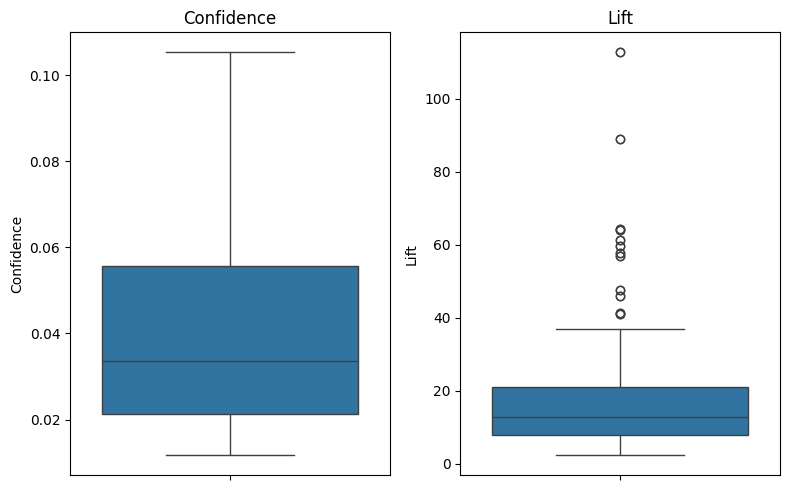

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_metrics_boxplots(rules):
  if not rules.empty:


      print(f"max lift value is {rules['lift'].max():.4f}")
      print(f"max confidence value is {rules['confidence'].max():.4f}")

      fig, axes = plt.subplots(1, 2, figsize=(8, 5))

      # plot Confidence
      sns.boxplot(data=rules['confidence'], ax=axes[0])
      axes[0].set_title('Confidence')
      axes[0].set_ylabel('Confidence')

      # plot Lift
      sns.boxplot(data=rules['lift'], ax=axes[1])
      axes[1].set_title('Lift')
      axes[1].set_ylabel('Lift')

      # show plot
      plt.tight_layout()
      plt.show()
  else:
      print("No rules to plot.")



plot_metrics_boxplots(rules)


# Cluster items + Apriori


In [9]:
from sklearn.cluster import KMeans


def add_cluster_users_col(num_clusters, transactions_matrix):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    user_clusters = kmeans.fit_predict(transactions_matrix)
    transactions_matrix['Cluster'] = user_clusters


num_clusters = 200
add_cluster_users_col(num_clusters,transactions)
df = transactions

<ipython-input-15-97f26412de46>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_percentages.index, y=cluster_percentages.values, palette='viridis')


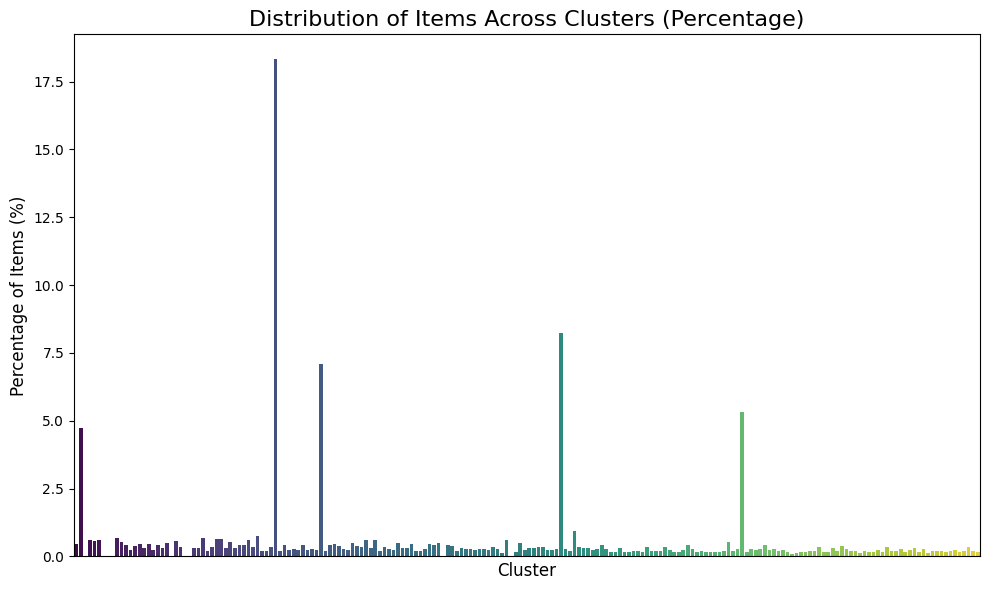

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the distribution of clusters (as percentages only)
cluster_percentages = (df['Cluster'].value_counts(normalize=True) * 100).sort_index()

# Plot the distribution using seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_percentages.index, y=cluster_percentages.values, palette='viridis')

# Add labels and title
plt.title('Distribution of Items Across Clusters (Percentage)', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Percentage of Items (%)', fontsize=12)

# Remove x-tick labels (to avoid showing the cluster index)
plt.xticks([])

# Show the plot
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df, df['Cluster'])
print(f"silhouette score of clustering is: {score}")


silhouette score of clustering is: 0.49376734052154664


In [ ]:

import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message=".*invalid value encountered in divide*")
warnings.filterwarnings("ignore", category=DeprecationWarning, message=".*DataFrames with non-bool types result in worse computationalperformance*")

from mlxtend.frequent_patterns import fpgrowth, association_rules
import numpy as np

# Function to compute global support
import numpy as np

def calculate_global_support(itemset, full_data):
    """Calculate global support of an itemset across the entire transactions dataset efficiently."""
    itemset = list(itemset)  # Ensure itemset is a list
    relevant_rows = full_data[itemset].sum(axis=1) == len(itemset)  # Check if all items are present
    return relevant_rows.mean()  # Equivalent to sum(relevant_rows) / len(full_data)


# Function to process a single cluster
def process_cluster(cluster_id, df, full_data, min_support):
    print(f"\nProcessing Cluster {cluster_id}...")

    # Extract transactions of the current cluster
    cluster_data = df[df['Cluster'] == cluster_id].drop(columns=['Cluster'])

    # Adjust min_support based on cluster size
    # scale_k = min_support * np.log(len(full_data))
    # min_support = scale_k / np.log(len(cluster_data)) if len(cluster_data) > 0 else 0
    scale_k = min_support * len(full_data)
    min_support = scale_k / len(cluster_data)
    print(f"min_support: {min_support:.5f}")

    # Run FPGrowth
    frequent_itemsets = fpgrowth(cluster_data, min_support=min_support, use_colnames=True)
    if frequent_itemsets.empty:
        print(f"No frequent itemsets found in Cluster {cluster_id}.")
        return None

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)



    print(f"Cluster {cluster_id}: {len(rules)} rules generated.")

    # plot_topk_rules_in_graph(rules, frequent_itemsets, k=10)

    return cluster_id, {"frequent_itemsets": frequent_itemsets, "rules": rules}

def find_clusters_rules(df, min_support):
  # Process clusters sequentially (without parallel computation)
  cluster_results = {}
  # Loop through all unique cluster IDs
  for cluster_id in sorted(df['Cluster'].unique()):
      if df['Cluster'].value_counts()[cluster_id] < 30:
          cluster_results[cluster_id] = cluster_id, {"frequent_itemsets": None, "rules": None}
          continue
      cluster_results[cluster_id] = process_cluster(cluster_id, df, df, min_support)
  return cluster_results

# pass the min support determined for the **baseline** whole dataset rule generation approach (will be scaled to match the smaller clusters)
cluster_results = find_clusters_rules(transactions, 0.00005)

In [ ]:
# Add diagnostic prints for a few rules with very high lift
for index, row in rules.iloc[:10].iterrows():
    antecedent = set(row["antecedents"])
    consequent = set(row["consequents"])
    rule = antecedent.union(consequent)

    # Calculate and print the components
    ant_supp = calculate_global_support(antecedent, transactions)
    cons_supp = calculate_global_support(consequent, transactions)
    rule_supp = calculate_global_support(rule, transactions)

    confidence = rule_supp / ant_supp if ant_supp > 0 else 0
    lift = confidence / cons_supp if cons_supp > 0 else 0

    print(f"Rule: {antecedent} → {consequent}")
    print(f"Antecedent support: {ant_supp:.8f}")
    print(f"Consequent support: {cons_supp:.8f}")
    print(f"Rule support: {rule_supp:.8f}")
    print(f"Confidence: {confidence:.8f}")
    print(f"Lift: {lift:.2f}")
    print("-" * 50)

In [ ]:
# Compute global metrics for each rule

for _, cluster_data in cluster_results.items():
  rules = cluster_data [1]["rules"]
  if rules is None:
    continue
  # Calculate global support for antecedents
  rules["global_antecedent_support"] = rules["antecedents"].apply(
      lambda x: calculate_global_support(set(x), transactions)
  )

  # Calculate global support for consequents
  rules["global_consequent_support"] = rules["consequents"].apply(
      lambda x: calculate_global_support(set(x), transactions)
  )

  # Calculate global support for antecedent + consequent together
  rules["global_rule_support"] = rules.apply(
      lambda row: calculate_global_support(
          set(row["antecedents"]).union(set(row["consequents"])),
          transactions
      ),
      axis=1
  )

  # Calculate global confidence
  rules["global_confidence"] = rules["global_rule_support"] / rules["global_antecedent_support"]

  # Calculate global lift
  rules["global_lift"] = rules["global_confidence"] / rules["global_consequent_support"]


In [ ]:
import matplotlib.pyplot as plt

# Initialize dictionary to store average metrics per cluster
cluster_metrics = {}

for cluster_id, data in cluster_results.items():
    # Access the dictionary that is the second element of the tuple
    rules = data[1]["rules"]

    if rules is not None and not rules.empty:
        avg_support = rules["global_rule_support"].mean()
        avg_confidence = rules["global_confidence"].mean()
        avg_lift = rules["global_lift"].mean()
    else:
        avg_support, avg_confidence, avg_lift = 0, 0, 0  # Handle empty clusters

    cluster_metrics[cluster_id] = {
        "Avg Support": avg_support,
        "Avg Confidence": avg_confidence,
        "Avg Lift": avg_lift
    }

# Convert dictionary to DataFrame for easier plotting
metrics_df = pd.DataFrame.from_dict(cluster_metrics, orient="index")
print(metrics_df)

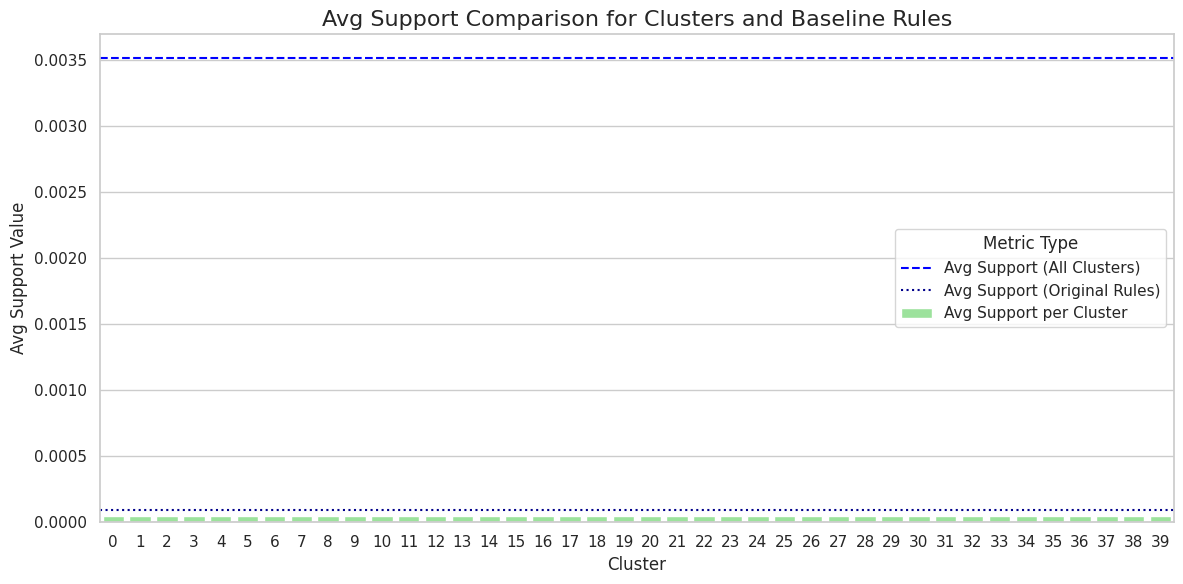

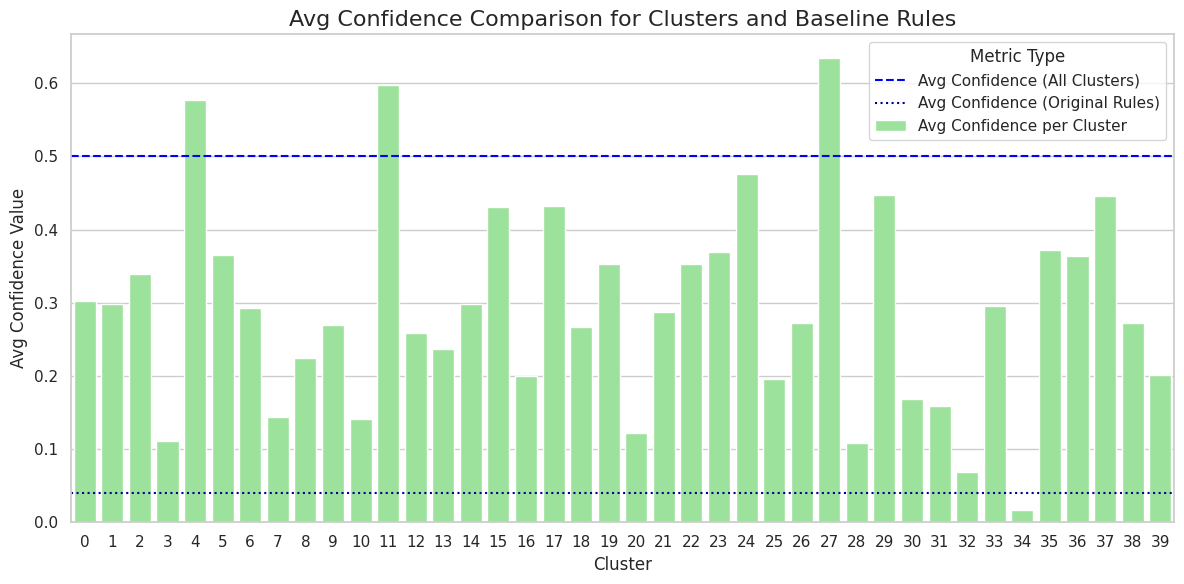

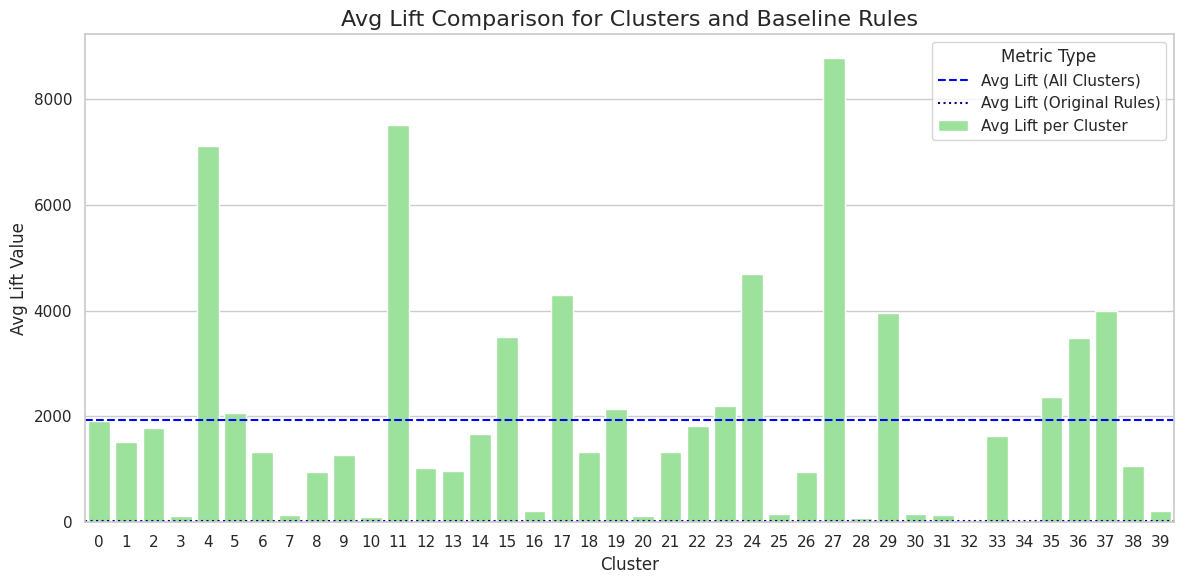

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize lists to store data for plotting
cluster_metrics_list = []
overall_metrics = {
    'Lift': [],
    'Confidence': [],
    'Support': [],
    'All Clusters': [],
    'Original Rules': []
}

# Extract the metrics for each cluster
for cluster_id, data in cluster_results.items():
    rules = data[1]["rules"]
    if rules is not None and not rules.empty:
        avg_support = rules["global_rule_support"].mean()
        avg_confidence = rules["global_confidence"].mean()
        avg_lift = rules["global_lift"].mean()
    else:
        avg_support, avg_confidence, avg_lift = 0, 0, 0  # Handle empty clusters

    # Add metrics to the list for each cluster
    cluster_metrics_list.append({
        'Cluster': cluster_id,
        'Avg Support': avg_support,
        'Avg Confidence': avg_confidence,
        'Avg Lift': avg_lift
    })

# Calculate the metrics for all clusters combined
all_rules_df = pd.concat([data[1]["rules"] for cluster_id, data in cluster_results.items() if data[1]["rules"] is not None], ignore_index=True)

if not all_rules_df.empty:
    avg_support_all_clusters = all_rules_df["support"].mean()
    avg_confidence_all_clusters = all_rules_df["confidence"].mean()
    avg_lift_all_clusters = all_rules_df["lift"].mean()
else:
    avg_support_all_clusters = avg_confidence_all_clusters = avg_lift_all_clusters = 0

# Add all clusters combined metrics to overall metrics
overall_metrics['All Clusters'] = [avg_support_all_clusters, avg_confidence_all_clusters, avg_lift_all_clusters]

# Calculate the metrics for the original (baseline) rules
original_rules_df = original_rules  # Assuming you have the baseline rules in 'original_rules'
if not original_rules_df.empty:
    avg_support_original = original_rules_df["support"].mean()
    avg_confidence_original = original_rules_df["confidence"].mean()
    avg_lift_original = original_rules_df["lift"].mean()
else:
    avg_support_original = avg_confidence_original = avg_lift_original = 0

# Add original rules metrics to overall metrics
overall_metrics['Original Rules'] = [avg_support_original, avg_confidence_original, avg_lift_original]

# Convert cluster metrics list into a DataFrame for easier plotting
cluster_metrics_df = pd.DataFrame(cluster_metrics_list)

# Prepare the data for plotting each metric separately
metrics = ['Avg Support', 'Avg Confidence', 'Avg Lift']
overall_values = {
    'All Clusters': overall_metrics['All Clusters'],
    'Original Rules': overall_metrics['Original Rules']
}

# Create individual plots for each metric (Support, Confidence, Lift)
for metric in metrics:
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the metrics for each cluster
    sns.barplot(x='Cluster', y=metric, data=cluster_metrics_df, color='lightgreen', label=f'{metric} per Cluster', ax=ax)

    # Plot the overall metrics (all clusters and original rules)
    ax.axhline(y=overall_values['All Clusters'][metrics.index(metric)], color='blue', linestyle='--', label=f'{metric} (All Clusters)')
    ax.axhline(y=overall_values['Original Rules'][metrics.index(metric)], color='darkblue', linestyle=':', label=f'{metric} (Original Rules)')

    # Add labels and title
    ax.set_title(f'{metric} Comparison for Clusters and Baseline Rules', fontsize=16)
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel(f'{metric} Value', fontsize=12)
    ax.legend(title='Metric Type')

    # Show the plot
    plt.tight_layout()
    plt.show()
